In [1]:
import pandas as pd
from sklearn.datasets import load_iris

IRIS=load_iris()
iris=pd.DataFrame (IRIS.data, columns=IRIS.feature_names)
iris['class'] = IRIS.target
iris['class'] = iris['class'].map({0:'setosa',1:'versicolor',2:'virginica'})

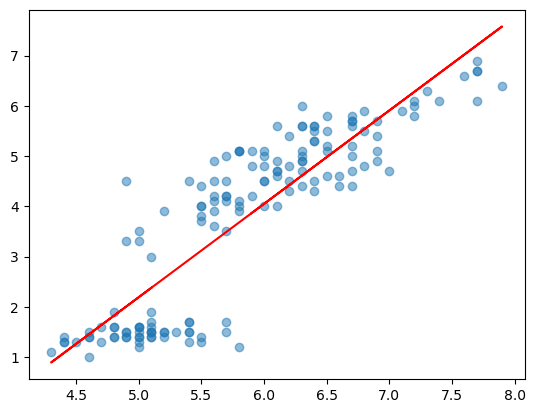

In [2]:
import matplotlib.pyplot as plt
import numpy as np

X, Y = iris['sepal length (cm)'], iris['petal length (cm)']
b1, b0 = np.polyfit(X,Y,1)
plt.scatter(X,Y,alpha=0.5)
plt.plot(X,b1*X+b0,c='red')
plt.show()

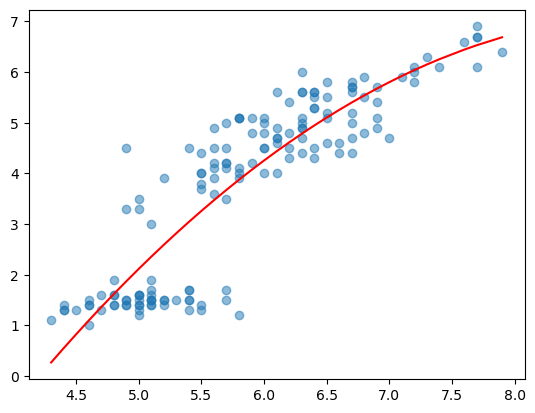

In [3]:
iris2 = iris.sort_values(by='sepal length (cm)')
  #2차 회귀식을 구하기 위해서는 x 변수로 정렬 필요
X, Y = iris2['sepal length (cm)'], iris2['petal length (cm)']
b2, b1, b0 = np.polyfit(X,Y,2)
plt.scatter(X,Y,alpha=0.5)
plt.plot(X,b2*X**2+b1*X+b0,c='red')
plt.show()

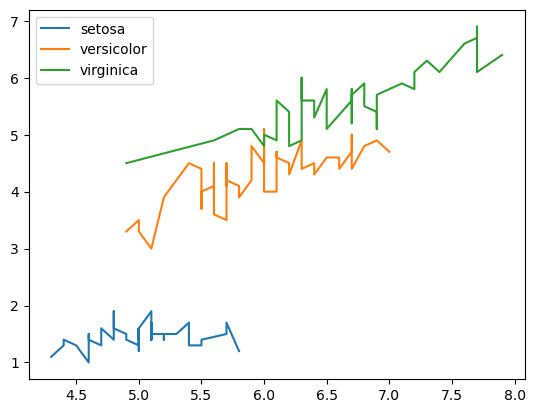

In [4]:
plt.plot('sepal length (cm)','petal length (cm)',data=iris2.loc[iris2['class']=='setosa'])
plt.plot('sepal length (cm)','petal length (cm)',data=iris2.loc[iris2['class']=='versicolor'])
plt.plot('sepal length (cm)','petal length (cm)',data=iris2.loc[iris2['class']=='virginica'])
plt.legend(iris2['class'].unique())
plt.show()

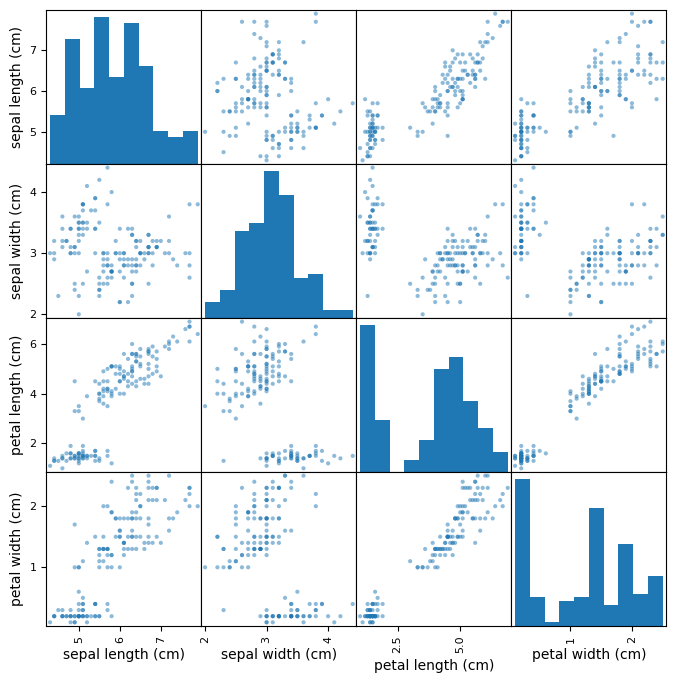

In [5]:
from pandas.plotting import scatter_matrix

scatter_matrix(iris, alpha=0.5, figsize=(8,8),diagonal='hist')
plt.show()

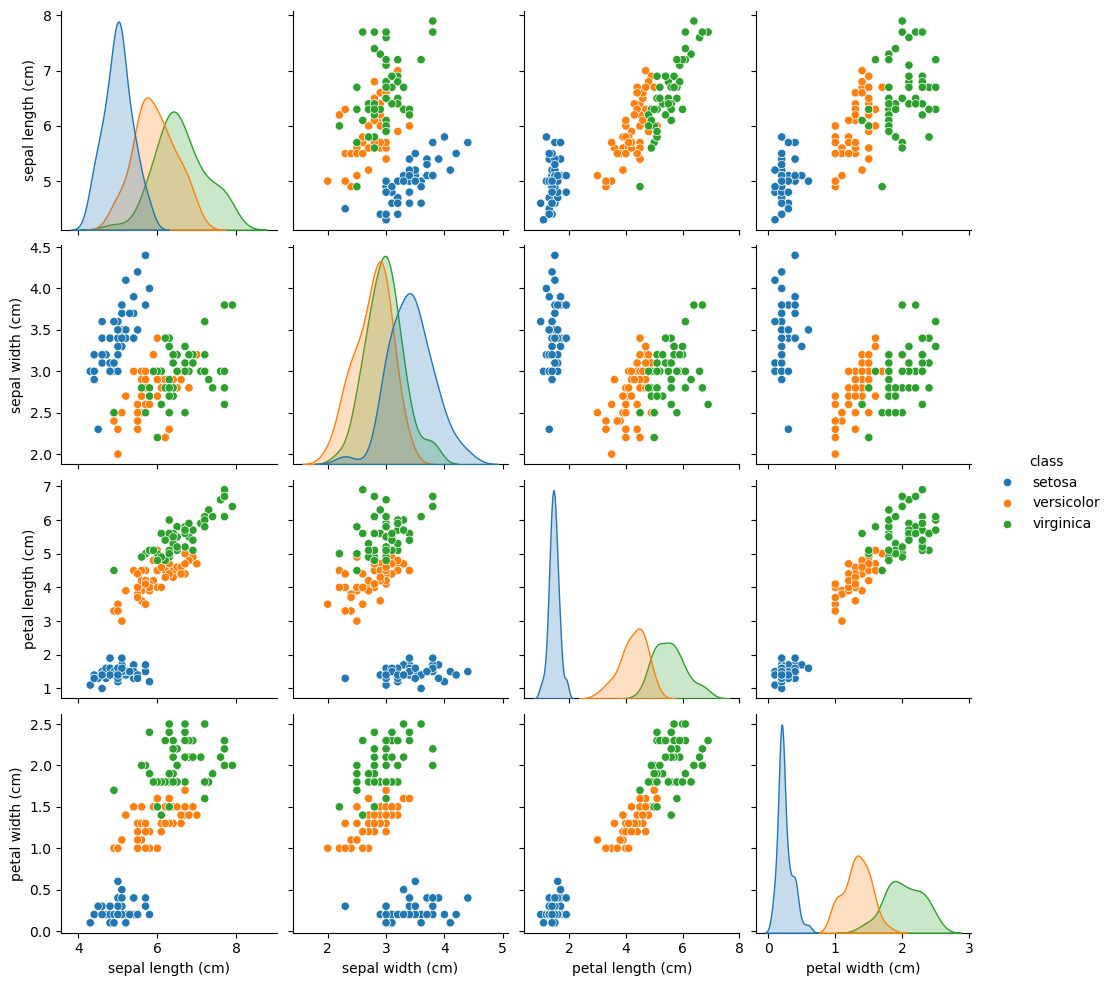

In [6]:
import seaborn as sns

sns.pairplot(iris, diag_kind='kde', hue='class')  # auto, kde, hist 중 하나
plt.show()

In [7]:
iris_corr = iris.drop(columns='class').corr(method='pearson')  # pearson, kendall, spearman 중 택1, 기본값은 pearson
print(iris_corr.to_string(line_width=1000))

                   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
sepal length (cm)           1.000000         -0.117570           0.871754          0.817941
sepal width (cm)           -0.117570          1.000000          -0.428440         -0.366126
petal length (cm)           0.871754         -0.428440           1.000000          0.962865
petal width (cm)            0.817941         -0.366126           0.962865          1.000000


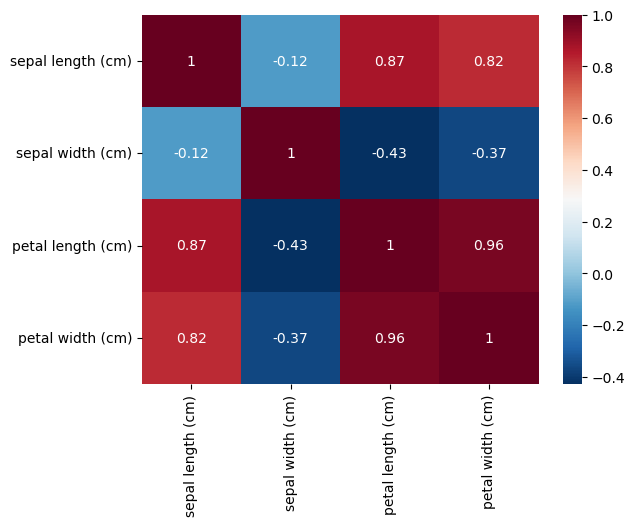

In [8]:
sns.heatmap(iris_corr,xticklabels=iris_corr.columns,yticklabels=iris_corr.columns,cmap='RdBu_r', annot=True)
plt.show()

In [17]:
#!pip uninstall pandas_profiling
#!pip install ydata_profiling

#!pip install numba==0.58.1

#from pandas_profiling import ProfileReport
from ydata_profiling import ProfileReport

profile = ProfileReport(iris, title="Iris Dataset Profiling Report", explorative=True)
# 결과를 Jupyter Notebook에서 표시
profile.to_notebook_iframe()

'''
import warnings 
from numba.core.errors import NumbaDeprecationWarning, NumbaPendingDeprecationWarning

warnings.simplefilter("ignore", category=NumbaDeprecationWarning)
warnings.simplefilter("ignore", category=NumbaPendingDeprecationWarning)
'''

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

'\nimport warnings \nfrom numba.core.errors import NumbaDeprecationWarning, NumbaPendingDeprecationWarning\n\nwarnings.simplefilter("ignore", category=NumbaDeprecationWarning)\nwarnings.simplefilter("ignore", category=NumbaPendingDeprecationWarning)\n'